# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime


# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

#api_keys.api_key

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(api_keys.api_key)

7e6496202f8ff2039053b9bdb7a363c6


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)#size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)#size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #print(lat_lng, " : ", city)   
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
pprint(cities)

742
['mataura',
 'ushuaia',
 'tessalit',
 'provideniya',
 'airai',
 'rikitea',
 'jamestown',
 'henties bay',
 'punta arenas',
 'kaitangata',
 'louisbourg',
 'hunza',
 'ocos',
 'northam',
 'tura',
 'kapaa',
 'mattru',
 'barentsburg',
 'kurilsk',
 'barrow',
 'yongan',
 'cherskiy',
 'saint anthony',
 'georgetown',
 'hobart',
 'erenhot',
 'cape town',
 'tuktoyaktuk',
 'samusu',
 'whitehorse',
 'ilulissat',
 'marzuq',
 'tasiilaq',
 'leningradskiy',
 'deputatskiy',
 'mar del plata',
 'chuy',
 'krasnoselkup',
 'vostok',
 'upernavik',
 'glendive',
 'the valley',
 'severo-kurilsk',
 'albany',
 'naze',
 'tiksi',
 'naranjito',
 'belushya guba',
 'kissidougou',
 'vaini',
 'butaritari',
 'garissa',
 'rio grande',
 'hithadhoo',
 'portland',
 'bluff',
 'port elizabeth',
 'ombessa',
 'wulanhaote',
 'victoria',
 'ribeira grande',
 'amarkantak',
 'hilo',
 'cockburn town',
 'codrington',
 'castro',
 'khatanga',
 'haines junction',
 'novikovo',
 'illoqqortoormiut',
 'yellowknife',
 'nouadhibou',
 'labuhan

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [76]:
import pyowm as owm
owm = owm.OWM(api_keys.api_key)

currentDateTime = datetime.datetime.now()

cityList = []
cityCountry = []
cityDate = []
cityLat = []
cityLon = []
cityTemp = []
cityTempMax = []
cityWindSpeed = []
cityClouds = []
cityHumidity = []


print("Number of cities: ", len(cities))
print("Estimated time to complete: ", round(len(cities)/60, 1), "Minutes\n")

#for i in range(3):
for i in range(len(cities)):
    try:
        cityLink = owm.weather_at_place(cities[i]) #establish link
        #print("cityLink: ", cityLink) # print link for api call
        
        #establish and make apicalls
        cityWeather = cityLink.get_weather() #get weather from link
        cityLocation = cityLink.get_location()
        cityReg = owm.city_id_registry()

        #check and print all data from the api
        #print(i)
        #print("Link Established - Got Weather")
        #city name
        #print("City: ", cities[i]) #show which city is being processed, api call was completed
        #country
        #print("Country: ", cityReg.ids_for(cities[i])[0][2])
        #date of reception
        #print("Date: ", cityWeather.get_reference_time()) #show which city is being processed, api call was completed
        #city latitude and longitude
        #print("City Latitude: ", cityLocation.get_lat()) #print latitude
        #print("City Longitude: ", cityLocation.get_lon()) #print longitude
        #city temperature
        #print("Temp: ", cityWeather.get_temperature(unit="celsius")["temp"])
        #city max temperature
        #print("Temp Max: ", cityWeather.get_temperature(unit="celsius")["temp_max"])
        #city wind speed
        #print("Wind Speed: ", cityWeather.get_wind(unit="meters_sec")["speed"])        
        #city humidity as an integer
        #print("Clouds: ", cityWeather.get_humidity()) #shows humidity, number value
        #city cloud cover as an integer
        #print("Clouds: ", cityWeather.get_clouds()) #shows clouds, number value
        
        #Testing to see if all values are available
        testvariable = cities[i]
        testvariable = cityReg.ids_for(cities[i])[0][2]
        testvariable = cityWeather.get_reference_time()
        testvariable = cityLocation.get_lat()
        testvariable = cityLocation.get_lon()
        testvariable = cityWeather.get_temperature(unit="celsius")["temp"]
        testvariable = cityWeather.get_temperature(unit="celsius")["temp_max"]
        testvariable = cityWeather.get_wind(unit="meters_sec")["speed"]
        testvariable = cityWeather.get_humidity()
        testvariable = cityWeather.get_clouds()

        #append all information if avaiable
        cityList.append(cities[i]) #append city to cityList, when call complete. will not append if call not completed
        #print("done")
        cityCountry.append(cityReg.ids_for(cities[i])[0][2]) #append city to cityList, when call complete. will not append if call not completed
        #print("done")
        cityDate.append(cityWeather.get_reference_time()) #append city to cityList, when call complete. will not append if call not completed
        #print("done")
        cityLat.append(cityLocation.get_lat()) #append latitude
        #print("done")
        cityLon.append(cityLocation.get_lon()) #append longitude
        #print("done")
        cityTemp.append(cityWeather.get_temperature(unit="celsius")["temp"])
        #print("done")
        cityTempMax.append(cityWeather.get_temperature(unit="celsius")["temp_max"])
        #print("done")
        cityWindSpeed.append(cityWeather.get_wind(unit="meters_sec")["speed"])
        #print("done")
        cityHumidity.append(cityWeather.get_humidity()) #append humidity to list
        #print("done")
        cityClouds.append(cityWeather.get_clouds()) #append cloud cover to list        
        #print("done")
        
        #print log for successful api call
        print("Processing Record " + str(i) + " of " + str(len(cities)) + ": " + cities[i] +  " - Successful")
        
    except:
        print("Processing Record " + str(i) + " of " + str(len(cities)) + ": " + cities[i] +  " - CITY NOT FOUND\nOR INFORMATION INCOMPLETE. SKIPPING...")
        
    
    #print new line for separation
    #print()

    if (i != 0 and i % 60 == 0):
        print("PAUSE\n")
        time.sleep(40)

#Record date of data reception
now = datetime.datetime.now()
dataDate = now.date()

print("!!!!!!!!!!!!!!!!!!!!DONE!!!!!!!!!!!!!!!!!")
print("Number of cities entered: ", len(cityList))

Number of cities:  742
Estimated time to complete:  12.4 Minutes

Processing Record 0 of 742: mataura - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 1 of 742: ushuaia - Successful
Processing Record 2 of 742: tessalit - Successful
Processing Record 3 of 742: provideniya - Successful
Processing Record 4 of 742: airai - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 5 of 742: rikitea - Successful
Processing Record 6 of 742: jamestown - Successful
Processing Record 7 of 742: henties bay - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 8 of 742: punta arenas - Successful
Processing Record 9 of 742: kaitangata - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 10 of 742: louisbourg - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 11 of 742: hunza - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 12 of 742: ocos - Successful
Processing Record 13 

Processing Record 137 of 742: bako - Successful
Processing Record 138 of 742: eldikan - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 139 of 742: coihaique - Successful
Processing Record 140 of 742: sao filipe - Successful
Processing Record 141 of 742: salvador - Successful
Processing Record 142 of 742: batagay-alyta - Successful
Processing Record 143 of 742: grand river south east - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 144 of 742: narovchat - Successful
Processing Record 145 of 742: tumannyy - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 146 of 742: saint-philippe - Successful
Processing Record 147 of 742: rawson - Successful
Processing Record 148 of 742: cam pha - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 149 of 742: bengkulu - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 150 of 742: narrabri - Successful
Processing Record 151 of 742: grand-

Processing Record 281 of 742: matay - Successful
Processing Record 282 of 742: hasaki - Successful
Processing Record 283 of 742: la romana - Successful
Processing Record 284 of 742: sentyabrskiy - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 285 of 742: kroya - Successful
Processing Record 286 of 742: vung tau - Successful
Processing Record 287 of 742: katubao - Successful
Processing Record 288 of 742: saint george - Successful
Processing Record 289 of 742: etchoropo - Successful
Processing Record 290 of 742: santa cruz - Successful
Processing Record 291 of 742: alamogordo - Successful
Processing Record 292 of 742: lavrentiya - Successful
Processing Record 293 of 742: zhangjiakou - Successful
Processing Record 294 of 742: casablanca - Successful
Processing Record 295 of 742: kununurra - Successful
Processing Record 296 of 742: abha - Successful
Processing Record 297 of 742: chudniv - Successful
Processing Record 298 of 742: ninghai - Successful
Processing Rec

Processing Record 420 of 742: iskateley - Successful
PAUSE

Processing Record 421 of 742: coreau - Successful
Processing Record 422 of 742: zanzibar - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 423 of 742: mizan teferi - Successful
Processing Record 424 of 742: sechura - Successful
Processing Record 425 of 742: broken hill - Successful
Processing Record 426 of 742: beringovskiy - Successful
Processing Record 427 of 742: tucuma - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 428 of 742: north bend - Successful
Processing Record 429 of 742: aykhal - Successful
Processing Record 430 of 742: changtu - Successful
Processing Record 431 of 742: san-pedro - Successful
Processing Record 432 of 742: praia da vitoria - Successful
Processing Record 433 of 742: lata - Successful
Processing Record 434 of 742: songea - Successful
Processing Record 435 of 742: puteyets - Successful
Processing Record 436 of 742: lagoa - Successful
Processing Record

Processing Record 563 of 742: muros - Successful
Processing Record 564 of 742: qasigiannguit - Successful
Processing Record 565 of 742: mouzakion - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 566 of 742: goderich - Successful
Processing Record 567 of 742: canutama - Successful
Processing Record 568 of 742: timbiras - Successful
Processing Record 569 of 742: tiruvottiyur - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 570 of 742: kathu - Successful
Processing Record 571 of 742: lillooet - Successful
Processing Record 572 of 742: karakose - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 573 of 742: taber - Successful
Processing Record 574 of 742: chambersburg - Successful
Processing Record 575 of 742: kalakamati - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 576 of 742: kirakira - Successful
Processing Record 577 of 742: comal - Successful
Processing Record 578 of 742: contamana - Su

Processing Record 670 of 742: makkaveyevo - Successful
Processing Record 671 of 742: qeshm - Successful
Processing Record 672 of 742: polis - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 673 of 742: fort saint john - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 674 of 742: artyk - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 675 of 742: lyuban - Successful
Processing Record 676 of 742: kabinda - Successful
Processing Record 677 of 742: halalo - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 678 of 742: kingsport - Successful
Processing Record 679 of 742: tamworth - Successful
Processing Record 680 of 742: sindand - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 681 of 742: nizhneyansk - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 682 of 742: ambulu - CITY NOT FOUND
OR INFORMATION INCOMPLETE. SKIPPING...
Processing Record 683 of 7

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [78]:
weatherDf = pd.DataFrame({"City" : cityList
                          , "Cloudiness": cityClouds
                          , "Country" : cityCountry
                          , "Date" : cityDate
                          , "Humidity" : cityHumidity
                          , "Latitude" : cityLat 
                          , "Longitude" : cityLon
                          , "Maximum Temperature" : cityTempMax
                          , "Wind Speed" : cityWindSpeed
                          })
weatherDf.to_csv("City_Weather_Data.csv")
weatherDf.head(20)


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Maximum Temperature,Wind Speed
0,ushuaia,90,AR,1544666400,71,-54.81,-68.31,11.00,3.60
1,tessalit,8,ML,1544668429,43,20.20,1.01,6.35,1.21
2,provideniya,90,RU,1544664600,72,64.42,-173.23,-11.00,5.00
3,rikitea,92,PF,1544667185,100,-23.12,-134.97,23.20,4.76
4,jamestown,76,AU,1544667028,67,-33.21,138.60,14.33,9.16
5,punta arenas,90,CL,1544662800,76,-53.16,-70.91,11.00,4.10
6,ocos,20,GT,1544665200,94,14.51,-92.19,25.00,4.71
7,northam,20,AU,1544665800,65,51.04,-4.21,7.00,10.80
8,tura,0,IN,1544668258,76,25.52,90.21,18.05,2.16
9,kapaa,40,US,1544666160,64,22.08,-159.32,28.30,10.80


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

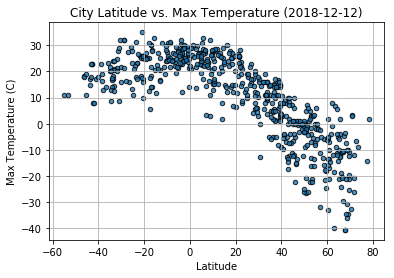

In [86]:
plt.scatter(
    weatherDf["Latitude"]
    , weatherDf["Maximum Temperature"]
    , s=20 
    , alpha=0.8
    , edgecolors="black"
    , linewidth=1
)
plt.title("City Latitude vs. Max Temperature (" + str(dataDate) + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(b=None, which='major', axis='both')
plt.savefig('City Latitude vs. Max Temperature.png', bbox_inches="tight")

#### Latitude vs. Humidity Plot

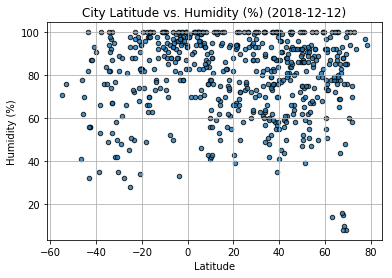

In [85]:
plt.scatter(
    weatherDf["Latitude"]
    , weatherDf["Humidity"]
    , s=20 
    , alpha=0.8
    , edgecolors="black"
    , linewidth=1
)

plt.title("City Latitude vs. Humidity (%) (" + str(dataDate) + ")")#, int(str(cityDate[0])[:2])")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=None, which='major', axis='both')
plt.savefig('City Latitude vs. Humidity (%).png', bbox_inches="tight")

#### Latitude vs. Cloudiness Plot

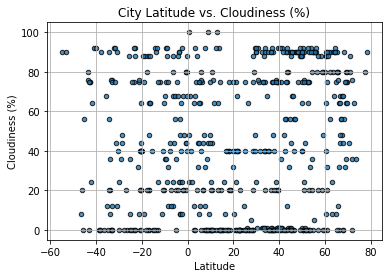

In [84]:
plt.scatter(
    weatherDf["Latitude"]
    , weatherDf["Cloudiness"]
    , s=20 
    , alpha=0.8
    , edgecolors="black"
    , linewidth=1
)

plt.title("City Latitude vs. Cloudiness (%)")#, int(str(cityDate[0])[:2])")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=None, which='major', axis='both')
plt.savefig('City Latitude vs. Cloudiness (%).png', bbox_inches="tight")

#### Latitude vs. Wind Speed Plot

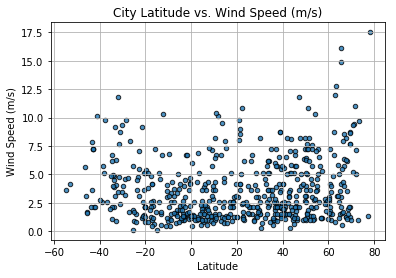

In [83]:
plt.scatter(
    weatherDf["Latitude"]
    , weatherDf["Wind Speed"]
    , s=20 
    , alpha=0.8
    , edgecolors="black"
    , linewidth=1
)

plt.title("City Latitude vs. Wind Speed (m/s)")#, int(str(cityDate[0])[:2])")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(b=None, which='major', axis='both')
plt.savefig('City Latitude vs. Wind Speed (%).png', bbox_inches="tight")